# Bonus assignment week 8
The goal of this assignment is to:
- understand components of a deep learning model and how they work mathmetically
- relate the components of the hyperparameters and model setup of keras tensorflow model
- propose improvements in design


# Assignment
1. Study the background text
2. Study the code steps. add comments in your own words and explain design choices such as 
    - number of layers,
    - width of layers,
    - number of epochs,
    - activation functions,
    - loss function,
    - gradient descent function,
    - regularization function
3. Run the code. Evaluate the performance by discussing the results of the evaluation metrics. What hyper parameters would you recommend to change? Explain your choices.
ANSWER: I would change the Epoch value to 90 this speeds up the process

4. How do I set up a batch_size and how does it effect the outcome? Why do you think the batch_size was not set in the first place?
ANSWER: They either didn't know or thought the default value of 32 worked fine. when i lowered the batch size it looks like it is learning faster and so i changed the epoch to 80

5. (Optional) Would there be a possibility to execute cross validation? How?
6. (Optional) How can I introduce a validation test set? What would I need to change in the code?
7. Study the tensor text. Consider a dataset of breast cancer images. What needs to be changed to the deep learning model design to make a model based on pictures? You can answer this in words, but if you like you can also try to code the solution.
ANSWER: you need a 4D tensor because it will have a shape like (samples, height, width, channels).
This is processed by 2D convolution layers
for an example see: https://keras.io/api/layers/convolution_layers/convolution2d/

Epoch 1/80
46/46 [==============================] - 1s 8ms/step - loss: 0.7089 - val_loss: 0.6711
Epoch 2/80
46/46 [==============================] - 0s 5ms/step - loss: 0.6798 - val_loss: 0.6526
Epoch 3/80
46/46 [==============================] - 0s 5ms/step - loss: 0.6606 - val_loss: 0.6305
Epoch 4/80
46/46 [==============================] - 0s 5ms/step - loss: 0.6355 - val_loss: 0.6095
Epoch 5/80
46/46 [==============================] - 0s 5ms/step - loss: 0.6007 - val_loss: 0.5713
Epoch 6/80
46/46 [==============================] - 0s 5ms/step - loss: 0.5964 - val_loss: 0.5375
Epoch 7/80
46/46 [==============================] - 0s 5ms/step - loss: 0.5439 - val_loss: 0.4837
Epoch 8/80
46/46 [==============================] - 0s 5ms/step - loss: 0.5208 - val_loss: 0.4380
Epoch 9/80
46/46 [==============================] - 0s 5ms/step - loss: 0.5042 - val_loss: 0.3975
Epoch 10/80
46/46 [==============================] - 0s 5ms/step - loss: 0.4541 - val_loss: 0.3588
Epoch 11/80
46/46 [

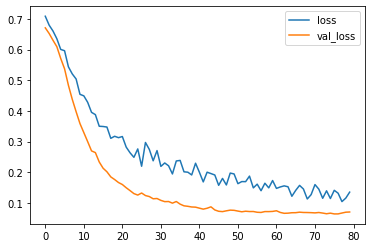

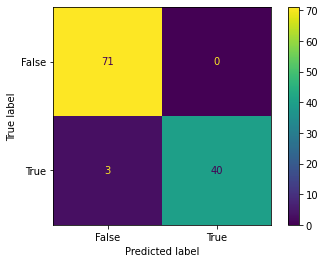

In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import yaml

def get_config():
    with open("../config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config
config = get_config()

# load the file
df = pd.read_csv(config['breastcancer'])

le = LabelEncoder()
le.fit(df['diagnosis'])
df['diagnosis'] = le.transform(df['diagnosis'])

X = df[df.columns[2:-1]]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# this is a sequential deep neural network meaning that it goes through the network from input to output

model = Sequential()
# the number of layers and the width of the layers is chosen randomely there according to the background text the choise of these two is more art then science
# the activation functions were likely used because of their popularity
# dropout is used to avoid overfitting
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
# sigmoid was likely chosen because it has a range of value between 0 and 1 meaning closer to 1 is more positive and closer to 0 is more negative
model.add(Dense(1, activation='sigmoid'))

# binary_crossentropy was chosen because there are only 2 classes (benign and malignant)
# the adam algorithm was used beccause it is a populair stochastic gradient descent 
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, y=y_train, batch_size=10, epochs=80, validation_data=(X_test, y_test))

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

predicted=(model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, predicted))

confusion_matrix = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                    display_labels = [False, True])

cm_display.plot()
plt.show()